In [2]:
import pandas as pd
from scripts.config import RAW_DATA_PATH
from scripts.utils import load_data

# Load the dataset
df = load_data(RAW_DATA_PATH)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Display the shape of the dataset
print("\nDataset Shape:")
print(df.shape)

# Display column names
print("\nColumn Names:")
print(df.columns.tolist())

2025-02-22 19:04:00,098 - INFO - Loading data from C:\project\-Credit-Card-Fraud-Detection\data\raw\creditcard.csv


First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

#### Observations from Step 1:
First 5 Rows:

The dataset contains 31 columns, including Time, V1 to V28 (anonymized features), Amount, and Class (target variable).

The Class column indicates whether the transaction is fraudulent (1) or not (0).

Dataset Info:

The dataset has 284,807 rows and 31 columns.

All columns are of type float64 except for Class, which is int64.

There are no missing values in the dataset (all columns have 284,807 non-null values).

Column Names:

The features V1 to V28 are the result of a PCA transformation (to protect user identity and sensitive information).

Time represents the seconds elapsed between each transaction and the first transaction.

Amount is the transaction amount.

Class is the target variable (0 for non-fraudulent, 1 for fraudulent transactions).



Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


2025-02-22 19:06:33,153 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-22 19:06:33,382 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


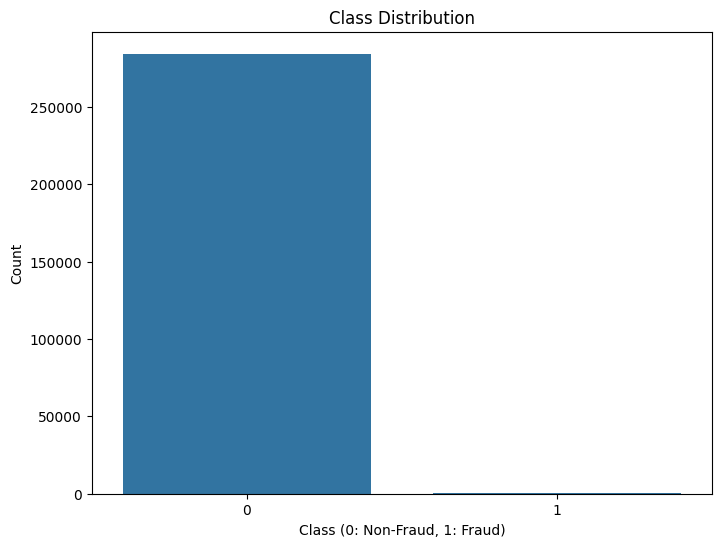


Percentage of Fraudulent Transactions: 0.17%


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.config import TARGET_COLUMN

# Class distribution
class_distribution = df[TARGET_COLUMN].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=TARGET_COLUMN, data=df)
plt.title("Class Distribution")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

# Percentage of fraudulent transactions
fraud_percentage = (class_distribution[1] / len(df)) * 100
print(f"\nPercentage of Fraudulent Transactions: {fraud_percentage:.2f}%")

Observations from Step 2:
Class Distribution:

Non-Fraudulent Transactions (Class 0): 284,315

Fraudulent Transactions (Class 1): 492

The dataset is highly imbalanced, with only 0.17% of transactions being fraudulent.

Implications:

Class imbalance is a common issue in fraud detection datasets.

If not handled properly, the model may become biased toward the majority class (non-fraudulent transactions) and fail to detect fraud.



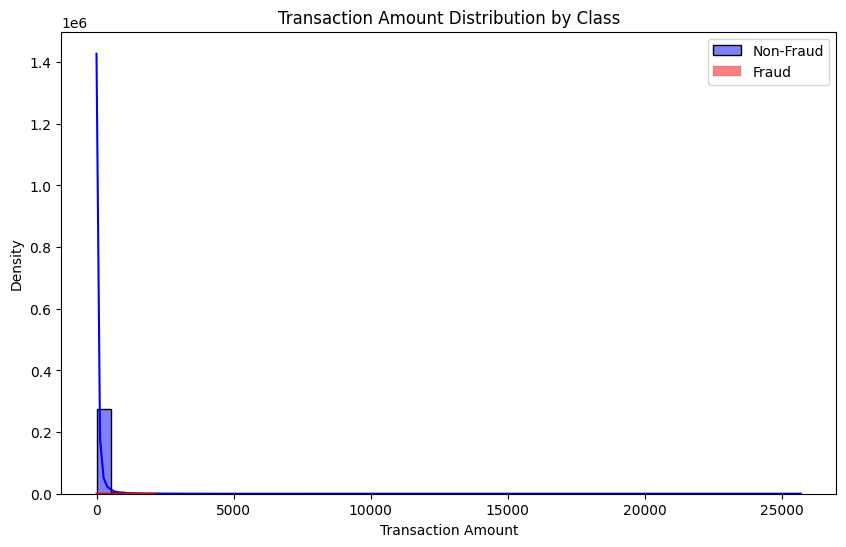

Summary Statistics for Non-Fraudulent Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Summary Statistics for Fraudulent Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [4]:
# Visualize transaction amounts for both classes
plt.figure(figsize=(10, 6))
sns.histplot(df[df[TARGET_COLUMN] == 0]["Amount"], bins=50, color="blue", label="Non-Fraud", kde=True)
sns.histplot(df[df[TARGET_COLUMN] == 1]["Amount"], bins=50, color="red", label="Fraud", kde=True)
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

# Summary statistics for transaction amounts
print("Summary Statistics for Non-Fraudulent Transactions:")
print(df[df[TARGET_COLUMN] == 0]["Amount"].describe())

print("\nSummary Statistics for Fraudulent Transactions:")
print(df[df[TARGET_COLUMN] == 1]["Amount"].describe())

Observations from Step 3:
Transaction Amount Distribution:

Non-Fraudulent Transactions:

The majority of transactions are small, with a mean amount of 
88.29
∗
∗
a
n
d
a
m
e
d
i
a
n
o
f
∗
∗
88.29∗∗andamedianof∗∗22.00.

There are some very large transactions (up to $25,691.16), which could be outliers.

Fraudulent Transactions:

The mean transaction amount is 
122.21
∗
∗
,
a
n
d
t
h
e
m
e
d
i
a
n
i
s
∗
∗
122.21∗∗,andthemedianis∗∗9.25.

Fraudulent transactions tend to have a wider range of amounts, with some high-value transactions (up to $2,125.87).

Key Insights:

Fraudulent transactions are generally smaller in amount compared to non-fraudulent transactions, but there are exceptions.

The presence of high-value transactions in both classes suggests that transaction amount alone may not be a strong predictor of fraud.



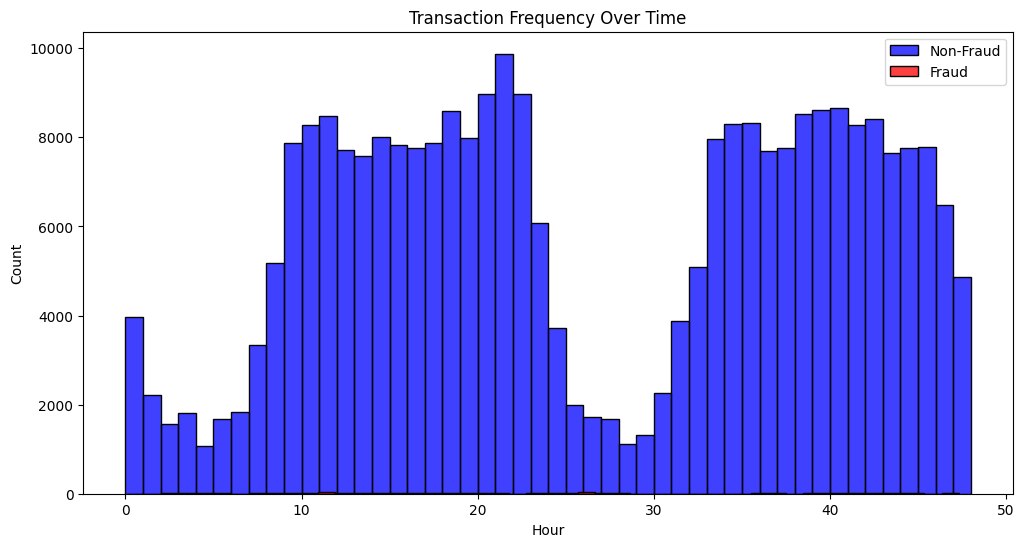

Summary Statistics for Non-Fraudulent Transactions (Time):
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64

Summary Statistics for Fraudulent Transactions (Time):
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [5]:
# Convert Time to hours for better interpretation
df["Hour"] = df["Time"] / 3600

# Plot transaction frequency over time
plt.figure(figsize=(12, 6))
sns.histplot(df[df[TARGET_COLUMN] == 0]["Hour"], bins=48, color="blue", label="Non-Fraud", kde=False)
sns.histplot(df[df[TARGET_COLUMN] == 1]["Hour"], bins=48, color="red", label="Fraud", kde=False)
plt.title("Transaction Frequency Over Time")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.legend()
plt.show()

# Summary statistics for Time
print("Summary Statistics for Non-Fraudulent Transactions (Time):")
print(df[df[TARGET_COLUMN] == 0]["Time"].describe())

print("\nSummary Statistics for Fraudulent Transactions (Time):")
print(df[df[TARGET_COLUMN] == 1]["Time"].describe())

Transaction Frequency Over Time:

The histogram (once plotted) will show the distribution of transactions over time (in hours) for both fraudulent and non-fraudulent transactions.

From the summary statistics:

Non-Fraudulent Transactions:

The mean time is 94,838 seconds (approximately 26.34 hours).

The distribution is spread out, with transactions occurring throughout the entire time range.

Fraudulent Transactions:

The mean time is 80,746 seconds (approximately 22.43 hours).

Fraudulent transactions tend to occur slightly earlier in the dataset compared to non-fraudulent transactions.

Key Insights:

There may be specific time windows where fraudulent transactions are more frequent.

The Time feature could be useful for creating time-based features (e.g., time of day, day of the week).



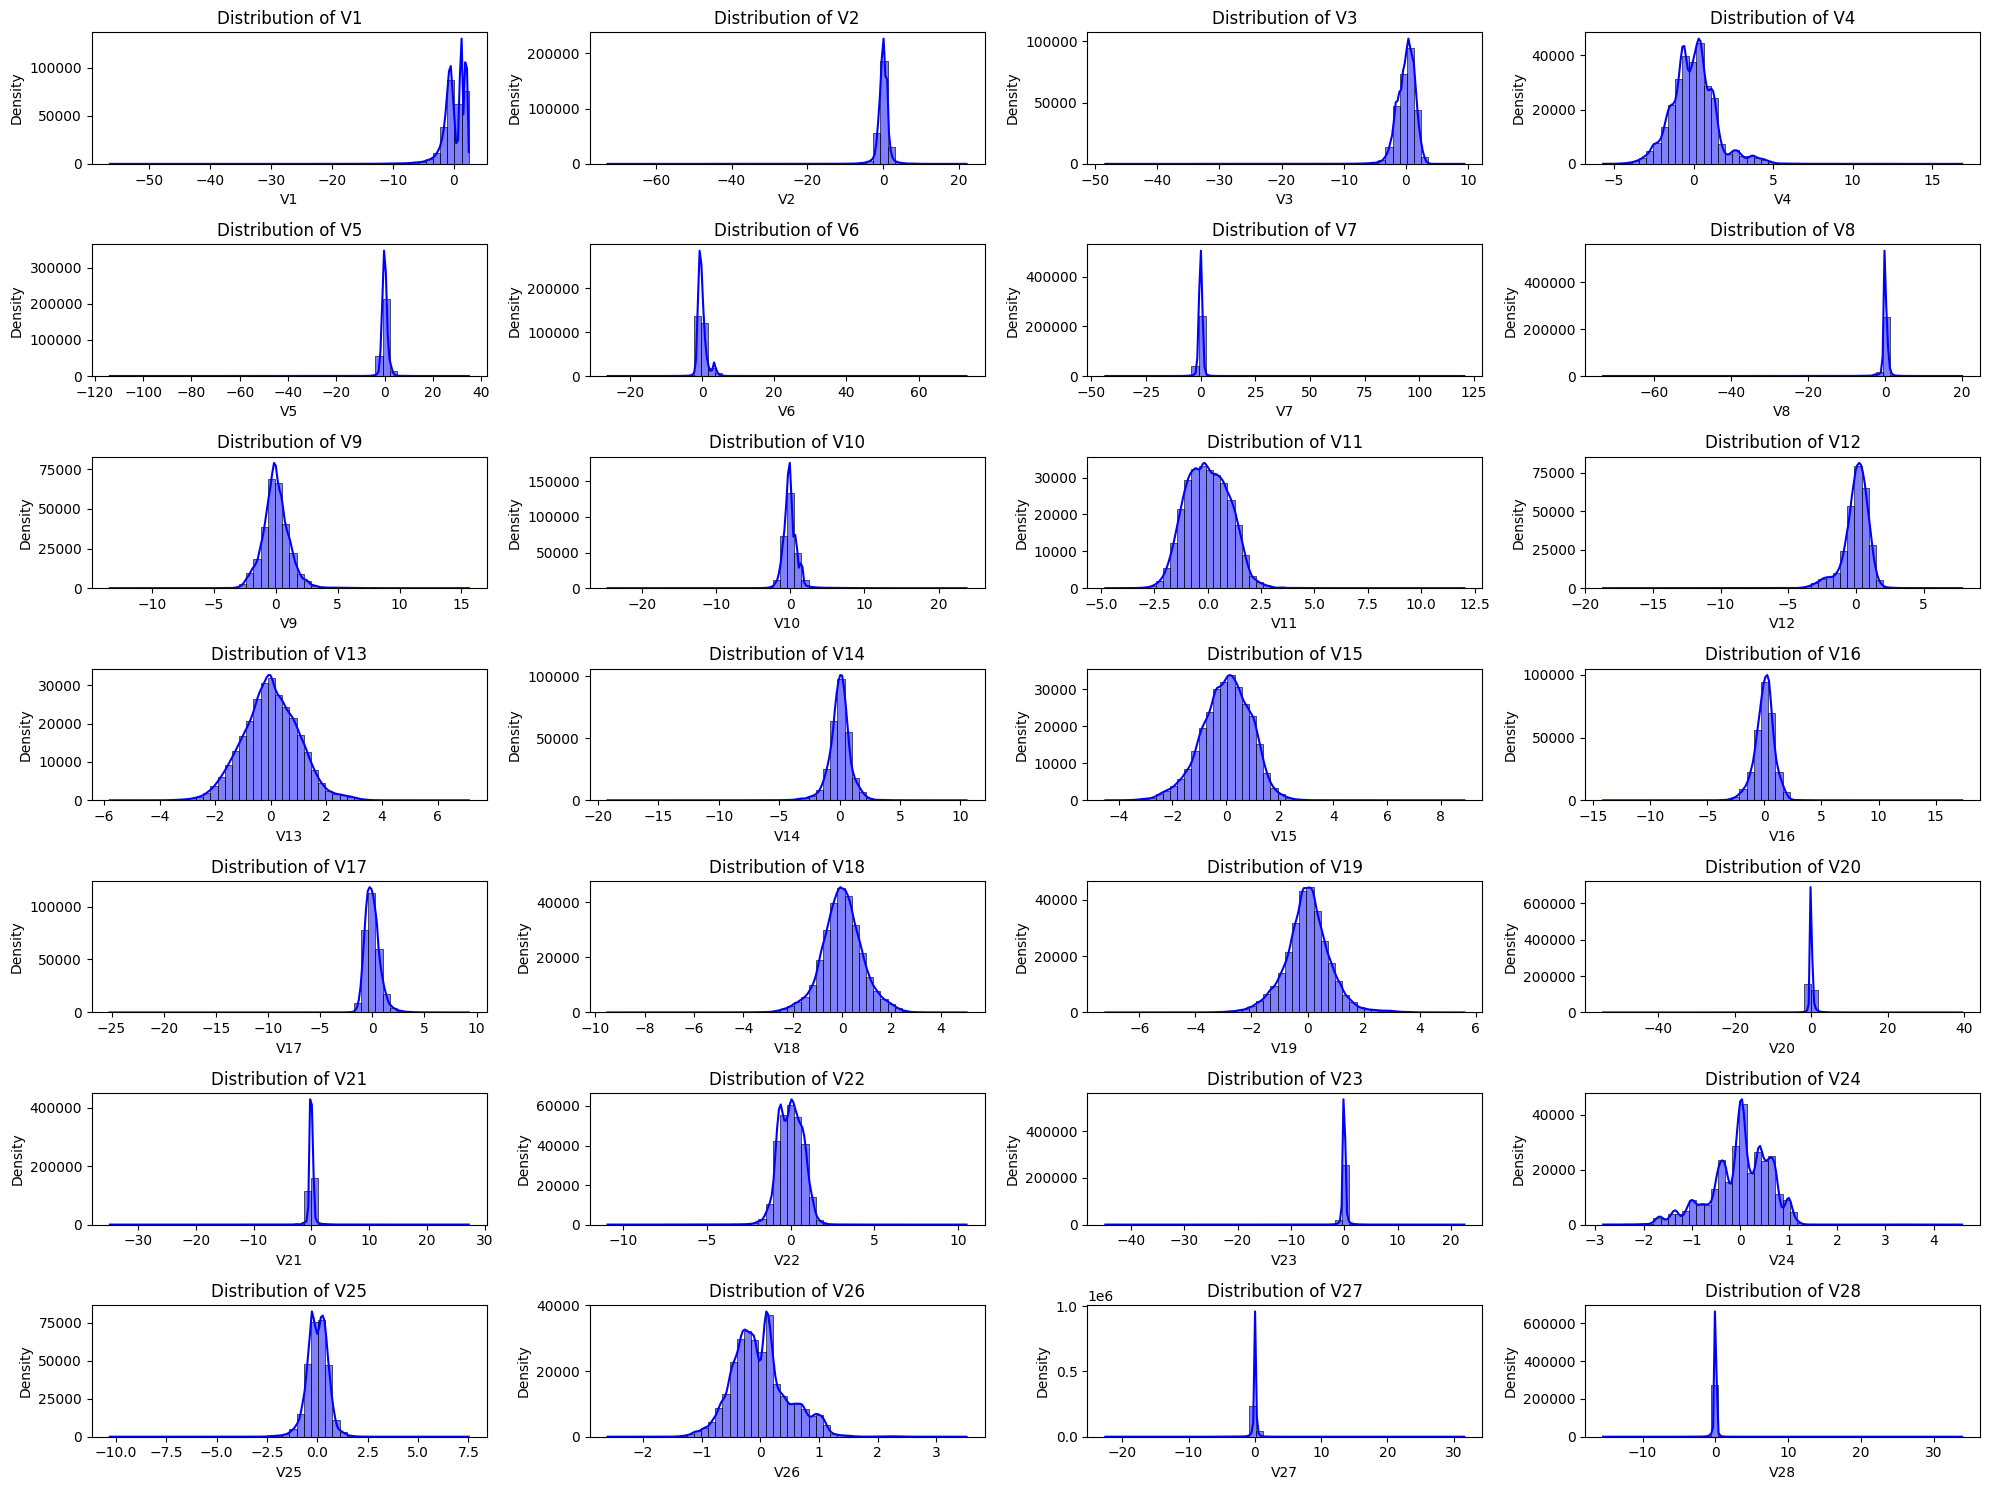

Summary Statistics for PCA-Transformed Features (V1-V28):
        count          mean       std         min       25%       50%  \
V1   284807.0  1.168375e-15  1.958696  -56.407510 -0.920373  0.018109   
V2   284807.0  3.416908e-16  1.651309  -72.715728 -0.598550  0.065486   
V3   284807.0 -1.379537e-15  1.516255  -48.325589 -0.890365  0.179846   
V4   284807.0  2.074095e-15  1.415869   -5.683171 -0.848640 -0.019847   
V5   284807.0  9.604066e-16  1.380247 -113.743307 -0.691597 -0.054336   
V6   284807.0  1.487313e-15  1.332271  -26.160506 -0.768296 -0.274187   
V7   284807.0 -5.556467e-16  1.237094  -43.557242 -0.554076  0.040103   
V8   284807.0  1.213481e-16  1.194353  -73.216718 -0.208630  0.022358   
V9   284807.0 -2.406331e-15  1.098632  -13.434066 -0.643098 -0.051429   
V10  284807.0  2.239053e-15  1.088850  -24.588262 -0.535426 -0.092917   
V11  284807.0  1.673327e-15  1.020713   -4.797473 -0.762494 -0.032757   
V12  284807.0 -1.247012e-15  0.999201  -18.683715 -0.405571  0.140

In [6]:
# Plot distributions of PCA-transformed features (V1-V28)
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[1:29]):  # Skip Time and Amount
    plt.subplot(7, 4, i + 1)
    sns.histplot(df[col], bins=50, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Summary statistics for PCA-transformed features
print("Summary Statistics for PCA-Transformed Features (V1-V28):")
print(df.iloc[:, 1:29].describe().transpose())

Observations from Step 5:
Feature Distributions:

The PCA-transformed features (V1 to V28) are centered around 0 with varying standard deviations.

Most features have a symmetric distribution, but some (e.g., V1, V2, V3) show longer tails, indicating the presence of outliers.

Key Insights:

The PCA transformation has successfully scaled the features, making them suitable for machine learning models.

The presence of outliers in some features suggests that fraud detection may require robust models that can handle such anomalies.



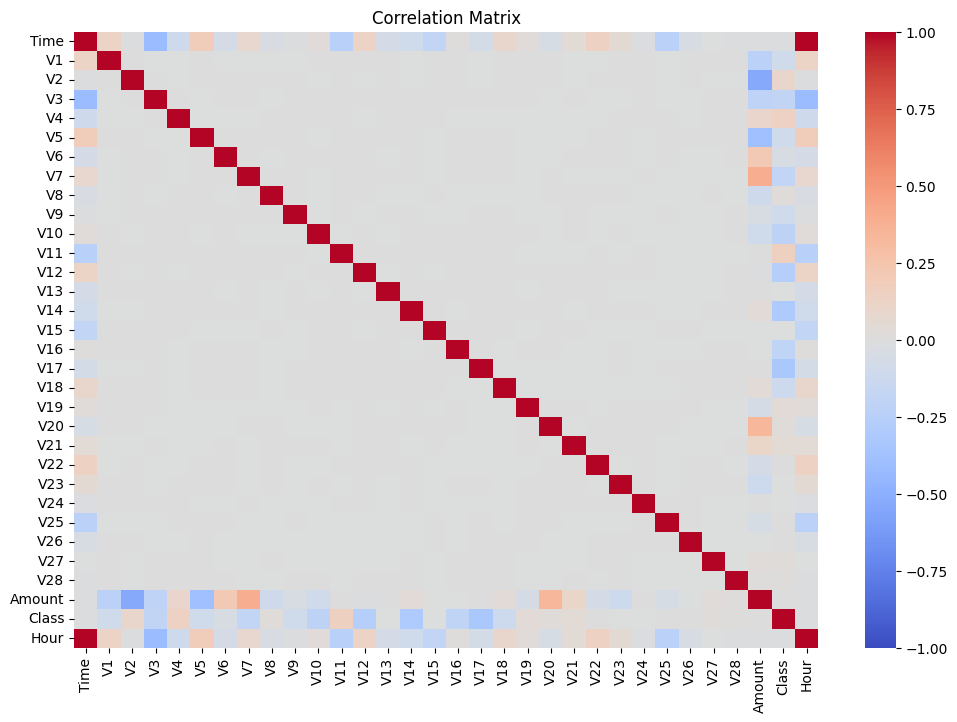

Top 10 Features Correlated with Class:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Bottom 10 Features Correlated with Class:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


In [7]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, annot=False)
plt.title("Correlation Matrix")
plt.show()

# Correlation with the target variable (Class)
correlation_with_target = correlation_matrix[TARGET_COLUMN].sort_values(ascending=False)

# Print top 10 features correlated with Class
print("Top 10 Features Correlated with Class:")
print(correlation_with_target.head(10))

# Print bottom 10 features correlated with Class
print("\nBottom 10 Features Correlated with Class:")
print(correlation_with_target.tail(10))

Observations from Step 6:
Top 10 Features Correlated with Class:

V11: Highest positive correlation (0.154876).

V4: Second-highest positive correlation (0.133447).

V2, V21, V19, V20, V8, V27, and V28 also show positive correlations, though weaker.

Bottom 10 Features Correlated with Class:

V17: Strongest negative correlation (-0.326481).

V14, V12, V10, V16, V3, V7, V18, V1, and V9 also show negative correlations.

Key Insights:

Features like V11, V4, and V2 are likely to be important predictors of fraud.

Features like V17, V14, and V12 may also be useful, as their negative correlations indicate they are associated with non-fraudulent transactions.

The correlation values are relatively low, suggesting that no single feature is a strong predictor on its own. This highlights the importance of using a combination of features for fraud detection.



In [8]:
# Create time-based features
df["Hour"] = df["Time"] % (24 * 3600) // 3600  # Extract hour of the day
df["Is_Night"] = df["Hour"].apply(lambda x: 1 if x < 6 or x >= 18 else 0)  # Day/Night indicator

# Create interaction features
df["V11_V4"] = df["V11"] * df["V4"]
df["V17_V14"] = df["V17"] * df["V14"]

# Create aggregated features
df["V_mean"] = df[["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10"]].mean(axis=1)
df["V_std"] = df[["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10"]].std(axis=1)

# Display the new features
print("New Features Added:")
print(df[["Hour", "Is_Night", "V11_V4", "V17_V14", "V_mean", "V_std"]].head())

New Features Added:
   Hour  Is_Night    V11_V4   V17_V14    V_mean     V_std
0   0.0         1 -0.760190 -0.064714  0.339886  1.031047
1   0.0         1  0.722750  0.016506  0.163420  0.417641
2   0.0         1  0.237173 -0.184195  0.048390  1.221397
3   0.0         1  0.195524  0.196967  0.018817  0.977863
4   0.0         1 -0.331634  0.265399  0.325321  0.778185


Observations from Step 7:
New Features:

Hour: Represents the hour of the day when the transaction occurred.

Is_Night: A binary feature indicating whether the transaction occurred at night (1) or during the day (0).

V11_V4: Interaction feature between V11 and V4.

V17_V14: Interaction feature between V17 and V14.

V_mean: Mean of the first 10 PCA-transformed features.

V_std: Standard deviation of the first 10 PCA-transformed features.

Key Insights:

The new features capture additional information that may help the model detect fraudulent transactions.

For example:

Time-Based Features: Fraudulent transactions may occur more frequently at specific times (e.g., at night).

Interaction Features: Combining highly correlated features (e.g., V11_V4) may reveal patterns that individual features cannot.

Aggregated Features: Summarizing groups of features (e.g., V_mean, V_std) can reduce dimensionality and highlight important trends.



In [9]:
from scripts.config import PROCESSED_DATA_PATH
from scripts.utils import save_data

# Save the processed dataset
save_data(df, PROCESSED_DATA_PATH)

print(f"Processed dataset saved to {PROCESSED_DATA_PATH}")

2025-02-22 19:27:09,324 - INFO - Saving data to C:\project\-Credit-Card-Fraud-Detection\data\processed\processed_data.csv


Processed dataset saved to C:\project\-Credit-Card-Fraud-Detection\data\processed\processed_data.csv
